# Processamento de Imagem e Video 
### **Sthefanie Passo**

In [ ]:
import sys
# sys.path.append('./usr/local/lib/python3.6/dist-packages')
from matplotlib import pyplot as plt
plt.style.use('seaborn-white')
from skimage.color import rgb2gray
import matplotlib.image as mpimg
from IPython.display import Image
#import helper as hp
'''from skimage import data
from skimage import color'''
from mpl_toolkits.mplot3d import Axes3D
import PIL
from scipy import ndimage
import numpy as np
%matplotlib inline
import cv2
import time
#import skvideo.utils
import random
plt.rcParams['font.size'] = 18

In [ ]:
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

error: ignored

#### Definição de funções para o pré-processamento:

In [ ]:
def ler_imagem_cinza(imagem):
    
    # ler a imagem
    img = cv2.imread(imagem)
    
    # converte em escala de cinza
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    return img_gray

In [ ]:
imagem_cz = ler_imagem_cinza('lenna.png')

# mostra a imagem modificada
plt.imshow(imagem_cz, cmap='gray')
plt.axis('off')
plt.show()

error: ignored

#### Carrega a imagem e converte para exibir em formato colorido

In [ ]:
def ler_imagem_colorida(imagem):
    
    # ler a imagem com opencv
    img = cv2.imread(imagem)
    
    # converte em formato RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

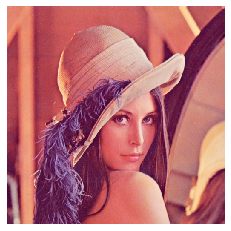

In [ ]:
imagem_crl = ler_imagem_colorida('lenna.png')
plt.imshow(imagem_crl)
plt.axis("off")
plt.show()

Função para ler arquivo

In [ ]:
def ler_arquivo(arquivo):
    with open(arquivo) as f:
        array = []
        for line in f:
            array.append([int(x) for x in line.split()])
    plt.plot(array, color='k')

Tamanho da imagem

In [ ]:
def obtem_tam_image(img):
    line = []
    col = [] 
    
    for i in range(0, len(img)):
        for j in range(0,len(img[1])):
            # b = img[i][j]
            line.append(i)
            col.append(j)
    # print(b)
    height, width = img.shape
    print(height, width)

In [ ]:
obtem_tam_image(imagem_cz)

512 512


# Questão 1. Alteração do Brilho

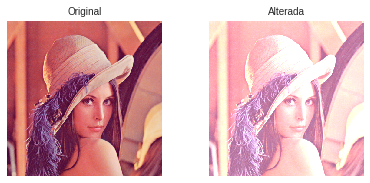

In [ ]:
def alteraBrilho(image):
    brig = 100    # brilho
    for r in range(image.shape[0]):
        for g in range(image.shape[1]):
            for b in range(image.shape[2]):
                image[r,g,b] = np.clip(image[r,g,b] + brig, 0, 255)
    return image

if __name__ == "__main__":
    
    fig = plt.figure(figsize=[10,10])
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    
    img_color = ler_imagem_colorida('lenna.png')
    
    # original
    ax = fig.add_subplot(2, 3, 1)
    ax.imshow(img_color)
    ax.axis("off")
    ax.set_title('Original', fontsize=10)
    
    # alteração do brilho
    imagem_brilho = alteraBrilho(img_color)
    
    # brilho
    ax = fig.add_subplot(2, 3, 2)
    ax.imshow(imagem_brilho, cmap = 'gray')
    ax.axis('off')
    ax.set_title('Alterada', fontsize=10)

# Questão 2. Imagem Negativa

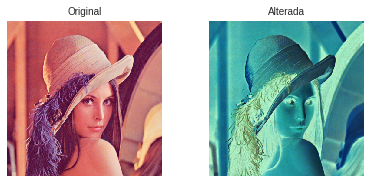

In [ ]:
def config_neg(img):
    for i in range(0, len(img)):
        for j in range(0, len(img[1])):
            img[i][j] = 255 - img[i][j]
    return img
    
if __name__ == "__main__":
        
    fig = plt.figure(figsize=[10,10])
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    
    img = ler_imagem_colorida('lenna.png')
    
    # original
    ax = fig.add_subplot(2, 3, 1)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title('Original', fontsize=10)
    
    # alteração 
    imagem_negativa = config_neg(img)
    
    # negativa
    ax = fig.add_subplot(2, 3, 2)
    ax.imshow(imagem_negativa)
    ax.axis('off')
    ax.set_title('Alterada', fontsize=10)

# Questão 3. Histograma Global

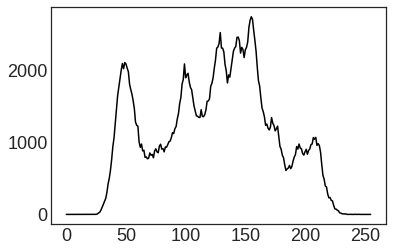

In [ ]:
def obtem_histograma(img):
    acumulador = np.zeros(256, np.int32)
    # linha, coluna = img.shape
    for i in range(0, len(img[0])):
        for j in range(0, len(img[1])):
            intensidade = 0
            # for k in range(len(img[i][j])):
            intensidade += img[i][j]
            acumulador[intensidade] += 1
    np.savetxt("histograma_global.txt", acumulador, delimiter=" ", newline = "\n", fmt="%i")
    return acumulador

if __name__ == "__main__":
    obtem_histograma(ler_imagem_cinza('lenna.png'))
    ler_arquivo('histograma_global.txt')

# Questão 4. Histograma Local

0 0 256 256

Imagem: 0 (256, 256)
256 0 256 256

Imagem: 1 (256, 256)
0 256 256 256

Imagem: 2 (256, 256)
256 256 256 256

Imagem: 3 (256, 256)
(4, 256, 256)


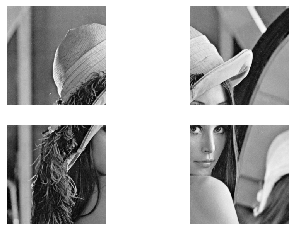

In [ ]:
def obtem_histograma_local(img):
    bins = np.zeros(256, np.int32)
    for linha in range(0, len(img[0])):
        for coluna in range(0, len(img[1])):
            intensidade = 0
            intensidade += img[linha][coluna]
            bins[intensidade] += 1
    return bins

def particiona_image(img):
    
    img_largura, img_altura = img.shape
    altura, largura = 2,2
    hist_local = []
    array_image = []
    i = 0
    
    # partiona a imagem em 4 partes de tamanho 256X256 cada
    for img_h in range(altura):
        for img_w in range(largura):
            x = img_largura//largura * img_w
            y = img_altura//altura * img_h
            h = (img_altura//altura)
            w = (img_largura//largura)
            print(x,y,h,w)
            
            # particiona a imagem
            img = img[y:y+h, x:x+w]

            array_image.append(img)
            print('\nImagem:', i, img.shape)
            
            # extrai o histograma
            hl = obtem_histograma_local(img)
            
            # concatena os histogramas
            hist_local.append(hl)
            
            # escreve no disco
            cv2.imwrite("img_crop_"+str(i)+".png", img)
            
            img = imagem_cz
            i += 1
            
    hist_local = np.array(hist_local)
    # salva em modo txt
    np.savetxt("histograma_local.txt", hist_local, delimiter=" ", newline = "\n", fmt="%i")
    return np.array(hist_local), np.array(array_image)

if __name__ == "__main__":
    hist, img = particiona_image(imagem_cz)
    print(img.shape)
    img_part_1 = ler_imagem_cinza('img_crop_0.png')
    img_part_2 = ler_imagem_cinza('img_crop_1.png')
    img_part_3 = ler_imagem_cinza('img_crop_2.png')
    img_part_4 = ler_imagem_cinza('img_crop_3.png')

    image_datas= img_part_1, img_part_2, img_part_3, img_part_4

    f, axarr = plt.subplots(2,2)
    axarr[0,0].imshow(image_datas[0], cmap='gray')
    axarr[0,0].axis('off')
    axarr[0,1].imshow(image_datas[1], cmap='gray')
    axarr[0,1].axis('off')
    axarr[1,0].imshow(image_datas[2], cmap='gray')
    axarr[1,0].axis('off')
    axarr[1,1].imshow(image_datas[3], cmap='gray')
    axarr[1,1].axis('off')

#### Histogramas locais

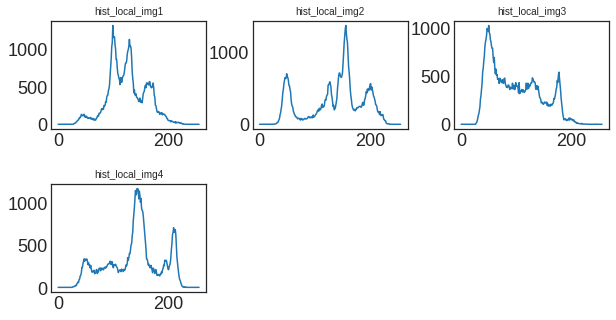

In [ ]:
# ler_arquivo(img_part_1)
fig = plt.figure(figsize=[10,5])
fig.subplots_adjust(hspace=0.5, wspace=0.3)

ax = fig.add_subplot(2, 3, 1)
ax.plot(obtem_histograma(img_part_1))
ax.set_title('hist_local_img1', fontsize=10)

ax = fig.add_subplot(2, 3, 2)
ax.plot(obtem_histograma(img_part_2))
ax.set_title('hist_local_img2', fontsize=10)

ax = fig.add_subplot(2, 3, 3)
ax.plot(obtem_histograma(img_part_3))
ax.set_title('hist_local_img3', fontsize=10)

ax = fig.add_subplot(2, 3, 4)
ax.plot(obtem_histograma(img_part_4))
ax.set_title('hist_local_img4', fontsize=10)
plt.show()

# Questão 5. Transformadas Radiométricas 

#### Equalização de Histograma

In [ ]:
def imhist(im):
    # calcula o histograma normalizado de uma imagem
    m, n = im.shape
    h = [0.0] * 256
    for i in range(m):
        for j in range(n):
            h[im[i, j]]+=1
    return np.array(h)/(m*n)

In [ ]:
def cumsum(h):
    # encontra a soma acumulativa de uma lista de numpy
    return [sum(h[:i+1]) for i in range(len(h))]

In [ ]:
def histeq(im):
    # calcula  o histograma
    h = imhist(im)
    cdf = np.array(cumsum(h)) # função de distribuição cumulativa
    sk = np.uint8(255 * cdf) # encontra valores de função de transferência
    s1, s2 = im.shape
    Y = np.zeros_like(im)
    # aplicando values transferidos para cada pixel
    for i in range(0, s1):
        for j in range(0, s2):
            Y[i, j] = sk[im[i, j]]
    H = imhist(Y)
    # retorna a imagem transformada, a original e o novo histograma, 
    # e a função de transformação
    return Y , h, H, sk

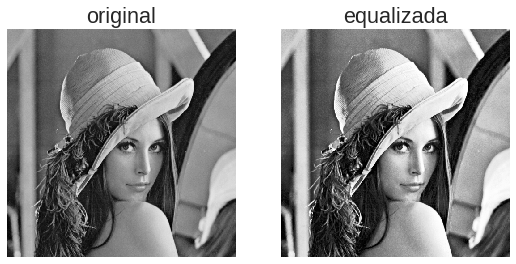

In [ ]:
if __name__ == "__main__":
    new_img, h, new_h, sk = histeq(imagem_cz)

    # mostra a imagem original
    plt.figure(figsize=[9,9])
    plt.subplot(121)
    plt.imshow(imagem_cz)
    plt.title('original')
    plt.set_cmap('gray')
    plt.axis('off')
    
    # equalizada
    plt.subplot(122)
    plt.imshow(new_img)
    plt.title('equalizada')
    plt.set_cmap('gray')
    plt.axis('off')
    plt.show()

#### Histograma da imagem original e equalizada

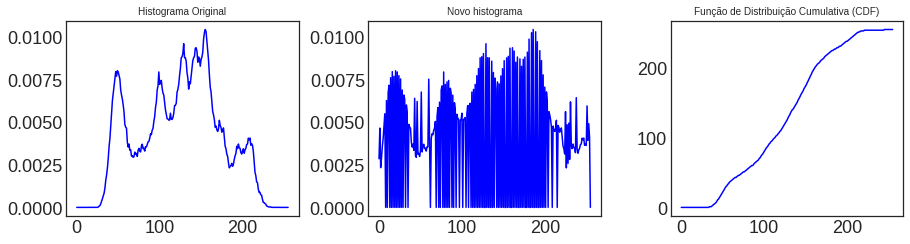

In [ ]:
fig = plt.figure(figsize=[15,9])
fig.subplots_adjust(hspace=0.5, wspace=0.3)
ax = fig.add_subplot(2, 3, 1)
ax.plot(h, color='b')
ax.set_title('Histograma Original', fontsize=10)

ax = fig.add_subplot(2, 3, 2)
ax.plot(new_h, color='b')
ax.set_title('Novo histograma', fontsize=10)

ax = fig.add_subplot(2, 3, 3)
ax.plot(sk, color = 'b')
ax.set_title('Função de Distribuição Cumulativa (CDF)', fontsize=10)
plt.show()

#### Suavização 

In [ ]:
def denoise(img, weight=0.1, eps=1e-3, num_iter_max=200):
    
    u = np.zeros_like(img)
    px = np.zeros_like(img)
    py = np.zeros_like(img)
    
    nm = np.prod(img.shape[:2])
    tau = 0.125
    
    i = 0
    while i < num_iter_max:
        u_old = u
        
        # componentes x e y do gradiente u
        ux = np.roll(u, -1, axis=1) - u
        uy = np.roll(u, -1, axis=0) - u
        
        # calcula a variável dual
        px_new = px + (tau / weight) * ux
        py_new = py + (tau / weight) * uy
        norm_new = np.maximum(1, np.sqrt(px_new **2 + py_new ** 2))
        px = px_new / norm_new
        py = py_new / norm_new

        # calcula a divergência
        rx = np.roll(px, 1, axis=1)
        ry = np.roll(py, 1, axis=0)
        div_p = (px - rx) + (py - ry)
        
        # atualiza a imagem
        u = img + weight * div_p
        
        # erro de cálculo
        error = np.linalg.norm(u - u_old) / np.sqrt(nm)
        
        if i == 0:
            err_init = error
            err_prev = error
        else:
            # para se o erro é bastante pequeno
            if np.abs(err_prev - error) < eps * err_init:
                break
            else:
                e_prev = error
                
        # para atualizar
        i += 1

    return u

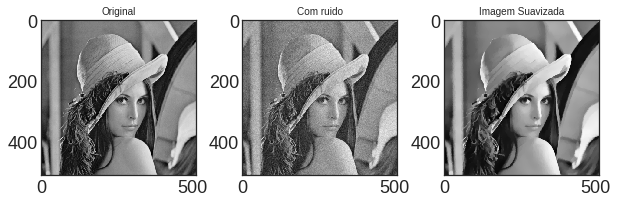

In [ ]:
if __name__ == "__main__":
    
    # carrega-se a imagem
    img = cv2.imread('lenna.png', 0)
    
    # adiciona ruido à imagem
    img_ruido = img + 8*np.random.standard_normal((512,512))
    
    # imagem suavizada
    imagem_suavizada = denoise(img_ruido, weight=15)
    
    # mostra todas as imagens para efeito de comparação
    fig = plt.figure(figsize=[10,10])
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    
    # mostra a imagem original
    ax = fig.add_subplot(2, 3, 1)
    # plt.subplot(121)
    ax.imshow(img,cmap = 'gray')
    ax.set_title('Original', fontsize=10)
    
    # mostra a imagem com ruido
    ax = fig.add_subplot(2, 3, 2)
    # plt.subplot(121)
    ax.imshow(img_ruido, cmap = 'gray')
    ax.set_title('Com ruido', fontsize=10)
    
    # mostra a imagem suavizada
    ax = fig.add_subplot(2, 3, 3)
    ax.imshow(imagem_suavizada, cmap = 'gray')
    ax.set_title('Imagem Suavizada', fontsize=10)

#### Expansão de contraste

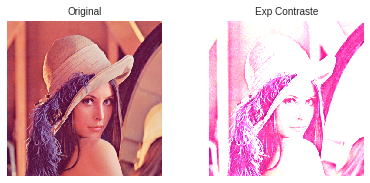

In [ ]:
def expancaoContraste(image):
    image2 = image
    contraste = 2.8 # ajusta o contraste
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            image2[y,x] = np.clip(contraste*image[y,x], 0, 255)
    return image2

if __name__ == "__main__":
    imagem = ler_imagem_colorida('lenna.png')
    
    fig = plt.figure(figsize=[10,10])
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    
    ax = fig.add_subplot(2, 3, 1)
    ax.imshow(imagem, cmap = 'gray')
    ax.axis('off')
    ax.set_title('Original', fontsize=10)
    
    ax = fig.add_subplot(2, 3, 2)
    ax.imshow(expancaoContraste(imagem), cmap = 'gray')
    ax.axis('off')
    ax.set_title('Exp Contraste', fontsize=10)

# 6. Filtros Espaciais

Para testar os filtros é feita a geração de ruidos na imagem sal e pimenta. Quando um número aleatório for par e menor que 2, o ruido sal/pimenta será ativado.

#### Ruido Sal Pimenta 

In [ ]:
# primeira versão
def ruidoSalPimenta(img,tipo=0):
    img2=img
    for i in range(0, len(img)):
        for j in range(0, len(img[1])):
            r = random.randint(10,20)
            if(r==12):# or img[i][j-1]==img[i][j]):
                r2 = random.randint(10,20)
                if(r2 < 16):
                    img2[i][j] = 0
                else:
                    img2[i][j] = 255      
    return img2

# segunda versão
def pimenta_sal(image):
    row,col,chl = image.shape
    s_vs_p = 0.5
    quant = 0.10 # porcentagem de ruido
    out = np.copy(image)
    
    # Sal
    num_salt = np.ceil(quant * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
    out[tuple(coords)] = 1

    # Pimenta
    num_pepper = np.ceil(quant* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
    out[tuple(coords)] = 0
    return out


#### Filtro da Média

In [ ]:
def filtroMedia(img, mask):
    row, col, chl = img.shape
    mask = hp.rebate_mask(np.loadtxt(mask))
    row_mask, col_mask = mask.shape

    inc = row_mask // 2
    r_ext, g_ext, b_ext = hp.create_extended_matrixes(img, inc)
    r_matrix, g_matrix, b_matrix = hp.create_rgb_matrixes(row, col)

    for i in range(row):
        for j in range(col):
            red_aux = np.sort(np.array(r_ext[i:i+row_mask, j:j+col_mask]).flatten())
            green_aux = np.sort(np.array(g_ext[i:i+row_mask, j:j+col_mask]).flatten())
            blue_aux = np.sort(np.array(g_ext[i:i+row_mask, j:j+col_mask]).flatten())
            
            # index = red_aux.shape[0] // 2
            r_matrix[i, j] = red_aux.sum()//len(red_aux)
            g_matrix[i, j] = green_aux.sum()//len(green_aux)
            b_matrix[i, j] = blue_aux.sum()//len(blue_aux)
    
    media_image = cv2.merge([r_matrix, g_matrix, b_matrix])
    return media_image

#### Filtro da Mediana

In [ ]:
def filtroMediana(img, mask):
    row, col, chl = img.shape
    mask = hp.rebate_mask(np.loadtxt(mask))
    row_mask, col_mask = mask.shape

    inc = row_mask // 2
    r_ext, g_ext, b_ext = hp.create_extended_matrixes(img, inc)
    r_matrix, g_matrix, b_matrix = hp.create_rgb_matrixes(row, col)

    for i in range(row):
        for j in range(col):
            red_aux = np.sort(np.array(r_ext[i:i+row_mask, j:j+col_mask]).flatten())
            green_aux = np.sort(np.array(g_ext[i:i+row_mask, j:j+col_mask]).flatten())
            blue_aux = np.sort(np.array(g_ext[i:i+row_mask, j:j+col_mask]).flatten())
            
            index = red_aux.shape[0] // 2
            r_matrix[i, j] = red_aux[index]
            g_matrix[i, j] = green_aux[index]
            b_matrix[i, j] = blue_aux[index]
            
    median_image = cv2.merge([r_matrix, g_matrix, b_matrix])
    return median_image

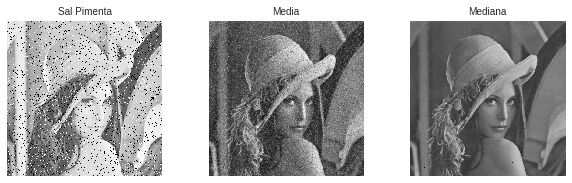

In [ ]:
if __name__ == "__main__":
    
    # carrega-se a imagem
    img = cv2.imread('lenna.png', 3)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_ruido = ruidoSalPimenta(img)
    
    img_mediana = filtroMediana(img_ruido, 'mask3x3.txt')
    img_media = filtroMedia(img_ruido, 'mask3x3.txt')
    
    fig = plt.figure(figsize=[10,10])
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    
    # mostra a imagem com ruido
    ax = fig.add_subplot(2, 3, 1)
    # plt.subplot(121)
    ax.imshow(img_ruido[:,:,0], cmap='gray')
    ax.set_title('Sal Pimenta', fontsize=10)
    ax.axis("off")
    
    ax = fig.add_subplot(2, 3, 2)
    # plt.subplot(121)
    ax.imshow(img_media[:,:,0], cmap='gray')
    ax.set_title('Media', fontsize=10)
    ax.axis("off")
    
    ax = fig.add_subplot(2, 3, 3)
    # plt.subplot(121)
    ax.imshow(img_mediana[:,:,0], cmap='gray')
    ax.set_title('Mediana', fontsize=10)
    ax.axis("off")
    plt.show()
    
    # cv2.imshow('Sal Pimenta', img_ruido)
    # cv2.imshow('Media',img_media)
    # cv2.imshow('Mediana',img_mediana)
    # cv2.waitKey(0) 

# Questão 7. Detecção de Borda

#### Quantização

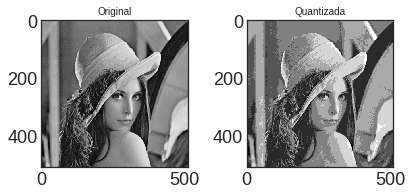

In [ ]:
# 255 / 31 = 8,22...24
# Assim, teremos uma imagem com 8 tons de cinza. A conta é feita desta forma para descartar a parte decimal 
# dos números e alterar o vetor para que possua apenas 8 valores possíveis.
# Recebe img, e quantiza img usando K cores

def quantizacao_simples(img, K):
    a = np.int32(img)
    bucket = 256 // K
    quantizado = (a // (256 // K))
    return np.uint8(quantizado) #* bucket


def quantizacao(img, r):
    '''
    m = np.amax(img)
    a = np.uint8(img/(m/float(n)))
    b = np.uint8((a/(n-1.))*255) #transforma de volta pra 0-255 (para exibir a imagem)
    '''
    img = np.uint8(img // r) * r
    return img

if __name__ == "__main__":
    imagem_cz = ler_imagem_cinza('lenna.png')
    fig = plt.figure(figsize=[10,10])
    fig.subplots_adjust(hspace=0.2, wspace=0.4)
    ax = fig.add_subplot(2, 3, 1)
    plt.imshow(imagem_cz, cmap='gray')
    ax.set_title('Original', fontsize=10)

    ax = fig.add_subplot(2, 3, 2)
    plt.imshow(quantizacao_simples(imagem_cz, 7), cmap='gray')
    # plt.imshow(quantizacao(imagem_cz, 7), cmap='gray')
    ax.set_title('Quantizada', fontsize=10)
    plt.show()

#### Operador Marr-Hildreth

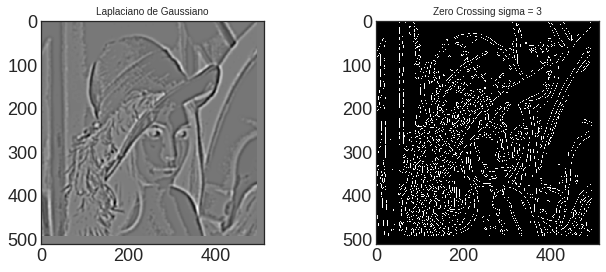

In [ ]:
def edgesMarrHildreth(img, sigma):
    """
            encontra as arestas usando o método de detecção de borda MarrHildreth...
            :param im : entrada da imagem
            :param sigma : sigma é o desvio padrão e refere-se a propagação gaussiana
            :return:
            uma imagem de borda binária...
    """
    size = int(2*(np.ceil(3*sigma))+1)

    x, y = np.meshgrid(np.arange(-size/2+1, size/2+1),
                       np.arange(-size/2+1, size/2+1))

    normal = 1 / (2.0 * np.pi * sigma**2)

    kernel = ((x**2 + y**2 - (2.0*sigma**2)) / sigma**4) * \
        np.exp(-(x**2+y**2) / (2.0*sigma**2)) / normal  # LoG filter

    kern_size = kernel.shape[0]
    log = np.zeros_like(img, dtype=float)

    # applicando filtro
    for i in range(img.shape[0]-(kern_size-1)):
        for j in range(img.shape[1]-(kern_size-1)):
            window = img[i:i+kern_size, j:j+kern_size] * kernel
            log[i, j] = np.sum(window)

    log = log.astype(np.int64, copy=False)

    zero_crossing = np.zeros_like(log)

    # computando zero crossing
    for i in range(log.shape[0]-(kern_size-1)):
        for j in range(log.shape[1]-(kern_size-1)):
            if log[i][j] == 0:
                if (log[i][j-1] < 0 and log[i][j+1] > 0) or (log[i][j-1] < 0 and log[i][j+1] < 0) or (log[i-1][j] < 0 and log[i+1][j] > 0) or (log[i-1][j] > 0 and log[i+1][j] < 0):
                    zero_crossing[i][j] = 255
            if log[i][j] < 0:
                if (log[i][j-1] > 0) or (log[i][j+1] > 0) or (log[i-1][j] > 0) or (log[i+1][j] > 0):
                    zero_crossing[i][j] = 255

    # plottando as imagens
    fig = plt.figure(figsize=[10,10])
    fig.subplots_adjust(hspace=0.4, wspace=0.5)
    a = fig.add_subplot(1, 2, 1)
    imgplot = plt.imshow(log, cmap='gray')
    a.set_title('Laplaciano de Gaussiano', fontsize=10)
    
    a = fig.add_subplot(1, 2, 2)
    imgplot = plt.imshow(zero_crossing, cmap='gray')
    string = 'Zero Crossing sigma = '
    string += (str(sigma))
    a.set_title(string, fontsize=10)
    plt.show()
    return zero_crossing

if __name__ == "__main__":
    
    img = quantizacao_simples(imagem_cz, 7)
    img7 = edgesMarrHildreth(img, 3)

# Questão 8. Descritor BIC

Border/Interior Classication (BIC): computa dois histogramas
um para os pixels classificados como de borda e outro para os pixels
classificados como internos. 
Borda: se existir pelo menos um pixel da vizinhaca-4 que seja de outra cor; 
Interior: todos pixels da vizinhaça-4 são da mesma cor;

In [ ]:
def BordaInterior(img,num=256):
    '''
    1: Dado uma imagem de entrada f.
    2: Quantizar o espaco de cor em intervalos {0, ..., 63}
    3: Classificar cada pixel da imagem f em borda ou interior, utilizando
    vizinhança-4
    4: Criar dois histogramas de cores, uma para cada tipo de pixel (borda e
    interior)
    5: http://www.ic.unicamp.br/~ffaria/pi2s2015/class19/aula_descritores_cor.pdf
    '''
    img_edit = img
    interior = np.zeros(num, np.int32)
    borda = np.zeros(num,np.int32)
    for i in range(1, len(img)-1):
        for j in range(1, len(img[1])-1):
            intensidade = img[i][j]
            leaft = img[i-1][j]
            right = img[i+1][j]
            top = img[i][j+1]
            down = img[i][j-1]
            if(leaft!=intensidade):
                borda[intensidade] += 1
                img_edit[i][j] = 0
            elif(right!=intensidade):
                borda[intensidade] += 1
                img_edit[i][j] = 0
            elif(top!=intensidade):
                borda[intensidade] += 1
                img_edit[i][j] = 0
            elif(down!=intensidade):
                borda[intensidade] += 1
                img_edit[i][j] = 1
            else: 
                interior[intensidade] += 1
                img_edit[i][j] = 255
        np.savetxt("histograma_borda.txt", borda, delimiter=" ", newline = "\n", fmt="%i")
        np.savetxt("histograma_interior.txt", interior, delimiter=" ", newline = "\n", fmt="%i")
    return img_edit

if __name__ == "__main__":
    img = cv2.imread('lenna.png',0) 
    img_quant = quantizacao_simples(img, 7)
    img_edit = BordaInterior(img_quant, 256//7)
    #plt.imshow(img_edit,cmap='gray')

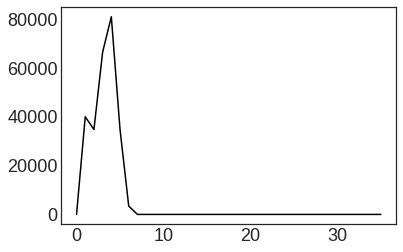

In [ ]:
ler_arquivo('histograma_borda.txt')

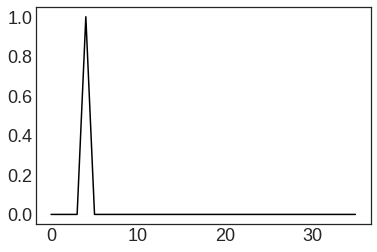

In [ ]:
ler_arquivo('histograma_interior.txt')